In [268]:
import pandas as pd
import jinja2
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [269]:
# read the csv file
match_data_unfiltered = pd.read_csv("preprocessed_dataframe_with_elo_mw_form_3.csv")
# match_data_unfiltered.to_excel("exel_test.xlsx")

In [270]:
# make FTR column to continous variable
def convert_ftr(result: str):
    if result == "D":
        return 1
    elif result == "H":
        return 2
    elif result == "A":
        return 0
    else: 
        return None
match_data_unfiltered['FTR'] = match_data_unfiltered['FTR'].apply(convert_ftr)

In [271]:
match_data_unfiltered = match_data_unfiltered.drop(["Unnamed: 0"], axis=1, errors="ignore")
# print(match_data_unfiltered.columns)
match_data_unfiltered.tail(n=5)

,index,Unnamed: 0.1,Unnamed: 0.1.1,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,DiffDefendOld,DiffElo,DiffAttack,DiffDefend,QuotEloOld,QuotAttackOld,QuotDefendOld,QuotElo,QuotAttack,QuotDefend
4891,4891,4891,301,D1,14/05/2022,Mainz,Ein Frankfurt,2,2,1,...,-0.215011,5,0.829131,-0.302993,1.006048,2.863016,1.161645,1.005924,1.707233,1.191627
4892,4892,4892,302,D1,14/05/2022,M'gladbach,Hoffenheim,5,1,2,...,2.041610,74,1.699968,3.115385,1.025800,0.993594,0.411271,1.089264,2.032081,0.266797
4893,4893,4893,303,D1,14/05/2022,Stuttgart,FC Koln,2,1,2,...,-0.445764,-6,-0.044929,0.269719,0.964111,0.513269,1.500792,0.992011,0.970749,0.803116
4894,4894,4894,304,D1,14/05/2022,Union Berlin,Bochum,3,2,2,...,1.160533,361,0.926361,1.086219,1.915154,1.462439,0.385259,1.932817,1.476492,0.532022
4895,4895,4895,305,D1,14/05/2022,Wolfsburg,Bayern Munich,2,2,1,...,0.941413,-279,-0.260822,0.621376,0.737978,0.863267,0.474337,0.748875,0.884370,0.667706


In [272]:
# print correlation matrix
correlation_matrix_match_data_unfiltered = match_data_unfiltered.corr()[['FTR', 'FTHG', 'FTAG']]
correlation_matrix_match_data_unfiltered = correlation_matrix_match_data_unfiltered.dropna()
correlation_matrix_match_data_unfiltered = correlation_matrix_match_data_unfiltered.iloc[6:]
correlation_matrix_match_data_unfiltered.style.background_gradient()

,FTR,FTHG,FTAG
HTHG,0.425434,0.691083,-0.077238
HTAG,-0.439499,-0.066105,0.681759
HS,0.189774,0.282759,-0.110333
AS,-0.201513,-0.121474,0.297404
HST,0.354642,0.529431,-0.118181
AST,-0.369956,-0.122165,0.534106
HF,-0.043109,-0.110952,-0.010506
AF,0.004917,-0.079891,-0.051651
HC,-0.007333,0.024723,-0.042649
AC,-0.040962,-0.068897,0.063109


In [273]:
# filter for specific columns
# match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeElo", "AwayElo", "HomeAttack", "HomeDefend", "AwayAttack", "AwayDefend"]]
# "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    # "AwayAttackOld", "AwayDefendOld"
# print correlation matrix
match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeEloOld", "AwayEloOld", "DiffEloOld", "HomeAttackOld", "HomeDefendOld", "AwayAttackOld", "AwayDefendOld", "DiffDefendOld", "DiffAttackOld", "MarketValueDiff", "PDiff3Matches", 'PDiffAllMatches']]

correlation_matrix_match_data_reduced = match_data_reduced.corr()[['FTR', 'FTHG', 'FTAG']]
correlation_matrix_match_data_reduced.style.background_gradient()

,FTR,FTHG,FTAG
FTR,1.000000,0.632818,-0.652825
FTHG,0.632818,1.000000,-0.115890
FTAG,-0.652825,-0.115890,1.000000
HomeEloOld,0.100912,0.165829,-0.028317
AwayEloOld,-0.115695,-0.045695,0.149910
DiffEloOld,0.265837,0.259707,-0.218648
HomeAttackOld,0.177938,0.213256,-0.090630
HomeDefendOld,0.103227,0.093173,-0.066225
AwayAttackOld,-0.147472,-0.086369,0.166395
AwayDefendOld,-0.094549,-0.087695,0.083982


In [274]:
match_data_bl = match_data_unfiltered.copy(deep=True)
match_data_bl = match_data_bl.dropna(subset=["PDiff3Matches"])
match_data_unfiltered = match_data_unfiltered.dropna(subset=["PDiff10Matches"])

In [275]:
# X = match_data_unfiltered.loc[:, ["HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
#     "AwayAttackOld", "AwayDefendOld"
# ]]
X = match_data_unfiltered.loc[:, ["DiffEloOld", "DiffAttackOld", "DiffDefendOld", "PDiff3Matches", "PDiffAllMatches", "PDiff10Matches", "MarketValueDiff"
]]

# y = match_data_unfiltered.loc[:, ["FTHG", "FTAG"]]
y = match_data_unfiltered.loc[:, ["FTR"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [276]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [277]:
clf.predict(X_test)

array([2, 0, 2, ..., 1, 2, 2], dtype=int64)

In [278]:
result = clf.score(X_test, y_test)

In [279]:
result

0.3733567046450482

Confusion matrix, without normalization
[[107 108 142]
 [ 87  71 110]
 [131 137 248]]
Normalized confusion matrix
[[0.29971989 0.30252101 0.3977591 ]
 [0.32462687 0.26492537 0.41044776]
 [0.25387597 0.26550388 0.48062016]]


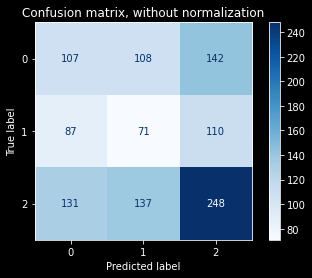

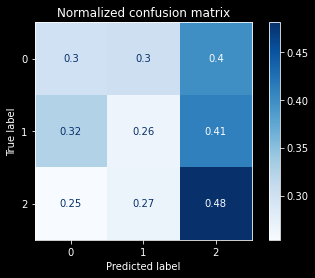

In [280]:
class_names = {
    'Away'
    ,'Draw',
    'Home'
}
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Ensemble Learning

In [281]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn import linear_model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [282]:
# X = match_data_unfiltered.loc[:, [
#     "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
#     "AwayAttackOld", "AwayDefendOld"
# ]]

# y = match_data_unfiltered.loc[:, ["FTR"]]

In [283]:
match_data_unfiltered

,index,Unnamed: 0.1,Unnamed: 0.1.1,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,DiffDefendOld,DiffElo,DiffAttack,DiffDefend,QuotEloOld,QuotAttackOld,QuotDefendOld,QuotElo,QuotAttack,QuotDefend
90,90,90,90,D1,07/11/06,Dortmund,Aachen,0,0,1,...,2.734967,9,-0.907079,1.917851,-48.367243,0.589690,0.244018,inf,0.221029,0.139566
91,91,91,91,D1,07/11/06,Mainz,Wolfsburg,1,2,0,...,-2.154378,-36,-0.265735,-1.859068,-0.741878,0.950151,6.361387,-0.894737,0.783241,3.945672
92,92,92,92,D1,07/11/06,Nurnberg,Werder Bremen,1,2,0,...,-0.757407,-53,-1.923435,-0.671556,0.222465,0.301254,2.040074,0.000000,0.356141,1.816829
93,93,93,93,D1,07/11/06,Stuttgart,Hamburg,2,0,2,...,-0.139634,73,2.700200,0.601449,-4.192516,8.598196,1.161107,-2.173913,18.362872,0.492335
94,94,94,94,D1,08/11/06,Bayern Munich,Hannover,0,1,0,...,0.211082,64,0.641911,-0.483956,-2.209767,16.573674,0.868628,-3.266667,2.582338,1.554187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,4891,4891,301,D1,14/05/2022,Mainz,Ein Frankfurt,2,2,1,...,-0.215011,5,0.829131,-0.302993,1.006048,2.863016,1.161645,1.005924,1.707233,1.191627
4892,4892,4892,302,D1,14/05/2022,M'gladbach,Hoffenheim,5,1,2,...,2.041610,74,1.699968,3.115385,1.025800,0.993594,0.411271,1.089264,2.032081,0.266797
4893,4893,4893,303,D1,14/05/2022,Stuttgart,FC Koln,2,1,2,...,-0.445764,-6,-0.044929,0.269719,0.964111,0.513269,1.500792,0.992011,0.970749,0.803116
4894,4894,4894,304,D1,14/05/2022,Union Berlin,Bochum,3,2,2,...,1.160533,361,0.926361,1.086219,1.915154,1.462439,0.385259,1.932817,1.476492,0.532022


In [284]:
X = match_data_bl.loc[:, ["DiffEloOld", "DiffAttackOld", "DiffDefendOld", "PDiff3Matches", "PDiffAllMatches", "MarketValueDiff"
]]
X = X.dropna()
#"PDiff10Matches",
# y = match_data_unfiltered.loc[:, ["FTHG", "FTAG"]]
y = match_data_bl.loc[:, ["FTR"]]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [285]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [286]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    scores = cross_val_score(model,
                             X,
                             y,
                             scoring='accuracy',
                             cv=cv,
                             n_jobs=-1,
                             error_score='raise')
    return scores

>lr 0.513 (0.011)
>lda 0.513 (0.010)
>knn 0.418 (0.014)
>cart 0.393 (0.013)
>svm 0.506 (0.013)
>bayes 0.488 (0.013)


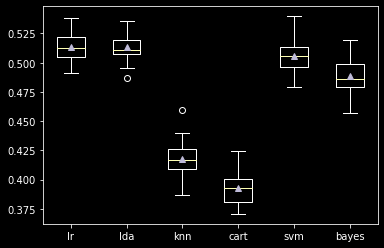

In [287]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [288]:
X

,DiffEloOld,DiffAttackOld,DiffDefendOld,PDiff3Matches,PDiffAllMatches,MarketValueDiff
27,20.000000,0.114761,3.090652,3.0,3,10.05
28,-36.852810,0.356934,-0.682129,-3.0,-3,-19.12
29,-27.737395,-0.250656,-1.436523,-6.0,-6,-145.13
30,-9.712256,-0.169922,0.048950,-1.0,-1,-9.48
31,-0.479977,0.232040,0.100113,1.0,1,-22.05
...,...,...,...,...,...,...
4891,5.106425,1.215809,-0.215011,4.0,4,-130.75
4892,22.074235,-0.013209,2.041610,4.0,-4,92.35
4893,-27.347735,-0.913907,-0.445764,-4.0,-22,92.97
4894,356.589890,0.812772,1.160533,1.0,12,40.90


#### Stack the single models to a combination

In [289]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('lda', LinearDiscriminantAnalysis()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [290]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['lda'] = LinearDiscriminantAnalysis()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models


>lr 0.513 (0.011)
>lda 0.513 (0.010)
>knn 0.418 (0.014)
>cart 0.394 (0.012)
>svm 0.506 (0.013)
>bayes 0.488 (0.013)
>stacking 0.511 (0.012)


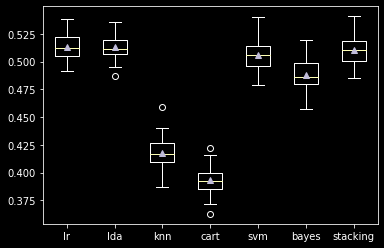

In [291]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Neural Network

In [292]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [293]:
# X = match_data_unfiltered.loc[:, [
#     "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
#     "AwayAttackOld", "AwayDefendOld"
# ]]

# y = match_data_unfiltered.loc[:, ["FTR"]]
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.33,
#                                                     random_state=42)
# X_train = X
# y_train = y

print(X_train.shape)
print(X_test.shape)


(2315, 7)
(1141, 7)


In [294]:
y_train

,FTR
4689,2
3551,0
1968,1
1772,2
2632,0
...,...
1635,2
1670,2
1834,2
1220,1


In [295]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

3


In [296]:
model = Sequential()
# model.add(Dense(500, activation='relu', input_dim=6))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(3, activation='softmax'))

model.add(Dense(500, activation='relu', input_dim=7))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [297]:
# build the model
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
73/73 [==============================] - 1s 3ms/step - loss: 2.0555 - accuracy: 0.4268
Epoch 2/20
73/73 [==============================] - 0s 3ms/step - loss: 1.3254 - accuracy: 0.4570
Epoch 3/20
73/73 [==============================] - 0s 2ms/step - loss: 1.1670 - accuracy: 0.4562
Epoch 4/20
73/73 [==============================] - 0s 2ms/step - loss: 1.1313 - accuracy: 0.4743
Epoch 5/20
73/73 [==============================] - 0s 2ms/step - loss: 1.0902 - accuracy: 0.4786
Epoch 6/20
73/73 [==============================] - 0s 2ms/step - loss: 1.0871 - accuracy: 0.4829
Epoch 7/20
73/73 [==============================] - 0s 2ms/step - loss: 1.0696 - accuracy: 0.4803
Epoch 8/20
73/73 [==============================] - 0s 2ms/step - loss: 1.0444 - accuracy: 0.4894
Epoch 9/20
73/73 [==============================] - 0s 3ms/step - loss: 1.0262 - accuracy: 0.5015
Epoch 10/20
73/73 [==============================] - 0s 2ms/step - loss: 1.0229 - accuracy: 0.5041
Epoch 11/20
73/73 [

In [298]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.5153347849845886% 
 Error on training data: 0.4846652150154114
Accuracy on test data: 0.5276073813438416% 
 Error on test data: 0.47239261865615845


In [299]:
# y_pred = [[1 if np.max(j)==i for i in j else 0] for j in pred_test]
y_pred = []
alpha = 0.15
for test in pred_test:
    # list_temp = []
    # for counter, j in enumerate(test):
    #     if np.max(test)==j:
    #         y_pred.append(counter)
    print(test[1])
    if test[1] > test[0]+alpha and test[1] > test[2]:
        y_pred.append(1)
    elif test[2] > test[0]+alpha:
        y_pred.append(2)
    else:
        y_pred.append(0)
        #     list_temp.append(1)
        # else:
        #     list_temp.append(0)
    # y_pred.append(list_temp)
y_pred
y_test_res = []
for test in y_test:
    # list_temp = []
    for counter, j in enumerate(test):
        if np.max(test)==j:
            y_test_res.append(counter)

0.30999097
0.24909066
0.15504229
0.10997929
0.27231115
0.25086448
0.27776074
0.29434007
0.28919268
0.29774797
0.26833493
0.26146013
0.32290453
0.30999696
0.25839972
0.27608302
0.27133602
0.08201737
0.27944016
0.14711724
0.18698165
0.2944068
0.30887753
0.25328928
0.20470275
0.15310638
0.28960577
0.21164256
0.2947312
0.2686598
0.24699686
0.17646527
0.2432998
0.21236409
0.2728646
0.20557998
0.2923453
0.29783967
0.23291251
0.1627793
0.30352166
0.16248251
0.2970379
0.24974512
0.33990672
0.12903808
0.29086047
0.28819385
0.26140177
0.23016511
0.26007473
0.22473414
0.024238508
0.26743743
0.28975958
0.27763185
0.28679705
0.2909471
0.27316225
0.25495654
0.27953443
0.29675016
0.14124863
0.46040067
0.41762093
0.28370014
0.29272977
0.32023957
0.26880395
0.2526521
0.2837001
0.27868396
0.29334998
0.31017604
0.28289306
0.23883039
0.26234648
0.13466135
0.28920814
0.25672063
0.26982486
0.1460651
0.22131144
0.28093386
0.22814694
0.27492115
0.07327337
0.24834622
0.29248124
0.28961572
0.33272025
0.24570096

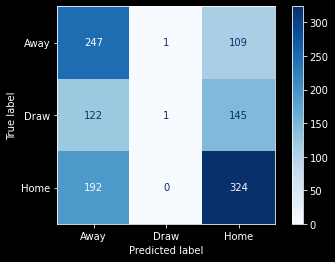

In [300]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test_res, y_pred) #, labels=["Draw", "Home", "Away"])
cfd = ConfusionMatrixDisplay(cf, display_labels=["Away", "Draw", "Home"])
cfd.plot(cmap=plt.cm.Blues)

In [301]:
# class_names = {
#     'Away'
#     ,'Draw',
#     'Home'
# }
# # Plot non-normalized confusion matrix
# titles_options = [
#     ("Confusion matrix, without normalization", None),
#     ("Normalized confusion matrix", "true"),
# ]
# for title, normalize in titles_options:
#     disp = ConfusionMatrixDisplay.from_estimator(
# models['lr'],
#         X_test,
#         y_test,
#         #display_labels=class_names,
#         cmap=plt.cm.Blues,
#         normalize=normalize,
#     )
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

In [302]:
X

,DiffEloOld,DiffAttackOld,DiffDefendOld,PDiff3Matches,PDiffAllMatches,MarketValueDiff
27,20.000000,0.114761,3.090652,3.0,3,10.05
28,-36.852810,0.356934,-0.682129,-3.0,-3,-19.12
29,-27.737395,-0.250656,-1.436523,-6.0,-6,-145.13
30,-9.712256,-0.169922,0.048950,-1.0,-1,-9.48
31,-0.479977,0.232040,0.100113,1.0,1,-22.05
...,...,...,...,...,...,...
4891,5.106425,1.215809,-0.215011,4.0,4,-130.75
4892,22.074235,-0.013209,2.041610,4.0,-4,92.35
4893,-27.347735,-0.913907,-0.445764,-4.0,-22,92.97
4894,356.589890,0.812772,1.160533,1.0,12,40.90


In [303]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import backend, callbacks
#create model
model = Sequential()

#get number of columns in training data
n_cols_2 = X.shape[1]
print(n_cols_2)
y = to_categorical(y)
#add layers to model
model.add(Dense(500, activation='sigmoid', input_dim=n_cols_2))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

#compile model using accuracy to measure model performance
# model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy', 'mse'], metrics=['accuracy'])
model.compile(metrics=['accuracy'], optimizer='rmsprop', 
              loss='categorical_crossentropy')
# K.set_value(model.optimizer.learning_rate, 0.01)

# early_stopping_monitor = EarlyStopping(patience=3)

# es = callbacks.EarlyStopping(monitor='val_loss', 
#                                    mode='min',
#                                    patience=10, 
#                                    restore_best_weights=True) 


history = model.fit(X, y,  epochs=20, validation_split=0.3) #, callbacks=[early_stopping_monitor]) #callbacks=[es],

6
Epoch 1/20
98/98 [==============================] - 1s 5ms/step - loss: 1.0566 - accuracy: 0.4850 - val_loss: 1.0422 - val_accuracy: 0.4657
Epoch 2/20
98/98 [==============================] - 0s 4ms/step - loss: 1.0259 - accuracy: 0.4958 - val_loss: 1.0518 - val_accuracy: 0.5007
Epoch 3/20
98/98 [==============================] - 0s 4ms/step - loss: 1.0248 - accuracy: 0.4971 - val_loss: 1.0368 - val_accuracy: 0.5037
Epoch 4/20
98/98 [==============================] - 0s 4ms/step - loss: 1.0193 - accuracy: 0.5029 - val_loss: 1.0418 - val_accuracy: 0.4888
Epoch 5/20
98/98 [==============================] - 0s 4ms/step - loss: 1.0170 - accuracy: 0.5090 - val_loss: 1.0205 - val_accuracy: 0.5075
Epoch 6/20
98/98 [==============================] - 0s 4ms/step - loss: 1.0154 - accuracy: 0.5058 - val_loss: 1.0268 - val_accuracy: 0.5090
Epoch 7/20
98/98 [==============================] - 0s 3ms/step - loss: 1.0143 - accuracy: 0.5064 - val_loss: 1.0957 - val_accuracy: 0.4925
Epoch 8/20
98/98 [

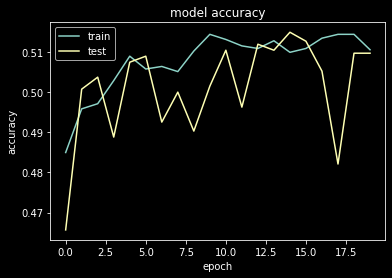

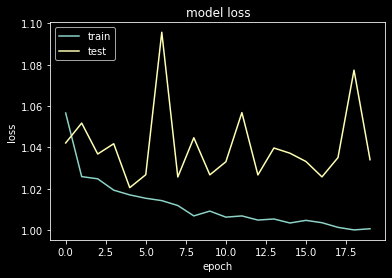

In [304]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

# summarize history for loss

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [305]:
models['lr']

LogisticRegression()

In [306]:
results

[array([0.51511758, 0.51399776, 0.50727884, 0.51959686, 0.49439462,
        0.5162374 , 0.50615901, 0.51175812, 0.52183651, 0.4955157 ,
        0.52967525, 0.50727884, 0.50615901, 0.52295633, 0.5044843 ,
        0.51175812, 0.52295633, 0.51175812, 0.51399776, 0.52242152,
        0.53863382, 0.50055991, 0.50391937, 0.52631579, 0.49887892,
        0.50615901, 0.50503919, 0.51287794, 0.52967525, 0.51457399,
        0.52183651, 0.51847704, 0.50839866, 0.51847704, 0.50224215,
        0.52183651, 0.52743561, 0.51735722, 0.5106383 , 0.4955157 ,
        0.53191489, 0.49160134, 0.50391937, 0.52967525, 0.5044843 ,
        0.53639418, 0.49608063, 0.50279955, 0.50951848, 0.51345291]),
 array([0.51959686, 0.50839866, 0.50727884, 0.51399776, 0.5044843 ,
        0.51735722, 0.50839866, 0.52071669, 0.51959686, 0.50336323,
        0.52183651, 0.51735722, 0.50839866, 0.5162374 , 0.50784753,
        0.5106383 , 0.52743561, 0.51287794, 0.51175812, 0.51569507,
        0.53191489, 0.50727884, 0.50055991, 0.